In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

# Data Wrangling

In [2]:
# Store csv files in respective variables
file1 = 'data.csv'
file2 = 'spotify_data.csv'

In [3]:
# Read csv files + convert them to respective DataFrames
file_1921_2020_spotify = pd.read_csv(file1)
file_1921_2020_spotify = pd.DataFrame(file_1921_2020_spotify)

file_1mm_spotify = pd.read_csv(file2)
file_1mm_spotify = pd.DataFrame(file_1mm_spotify)

In [4]:
file_1921_2020_spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
file_1mm_spotify.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [6]:
# Show respective shapes of DataFrames
print('The rows, columns of the 1921-2020 file are:', file_1921_2020_spotify.shape)
print('The rows, columns of the 1mm file are:', file_1mm_spotify.shape)

The rows, columns of the 1921-2020 file are: (169909, 19)
The rows, columns of the 1mm file are: (1159764, 20)


In [7]:
# Fill na values with string value of "other"
file_1mm_spotify.fillna(value='other', inplace=True)

In [8]:
# Convert 'duration_ms' field in file_1921_2020_spotify to minutes for readability purposes (ms to minutes)
file_1921_2020_spotify['duration_ms'] = (file_1921_2020_spotify['duration_ms']/ 60000).round(2)

# Rename fields
file_1921_2020_spotify = file_1921_2020_spotify.rename(columns = {'duration_ms':'duration_minutes', 
                                                                  'name':'track_name','artists':'artist_name'})

# Drop duplicate columns - file2 field 'release_date'
del file_1921_2020_spotify['release_date']

# Strip brackets and quotes in file1 field 'artists'
file_1921_2020_spotify['artist_name'] = file_1921_2020_spotify['artist_name'].str.strip('[]')
file_1921_2020_spotify['artist_name'] = file_1921_2020_spotify['artist_name'].str.replace("'",'')

# Round float fields so they all show two decimal places
file_1921_2020_spotify[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                        'speechiness', 'tempo', 'valence']] = file_1921_2020_spotify[['acousticness', 
                                                                                      'danceability', 'energy', 
                                                                                      'instrumentalness', 
                                                                                      'liveness', 'loudness', 
                                                                                      'speechiness', 'tempo', 
                                                                                      'valence']].round(2)

# Rearrange fields for interpretability purposes
file_1921_2020_spotify = file_1921_2020_spotify[['artist_name', 'track_name', 'duration_minutes', 'id', 'year', 
                                                 'popularity', 'explicit', 'mode', 'key', 'acousticness', 
                                                 'danceability', 'energy','instrumentalness', 'liveness', 
                                                 'loudness', 'speechiness', 'tempo', 'valence']]

In [9]:
# Convert 'duration_ms' field in file_1mm_spotify to minutes for readability purposes (ms to minutes)+ rename field
file_1mm_spotify['duration_ms'] = (file_1mm_spotify['duration_ms']/ 60000).round(2)
file_1mm_spotify = file_1mm_spotify.rename(columns = {'duration_ms':'duration_minutes'})

# Drop the first 'Unamed: 0' field and the time_signature' field as it provides no value
del file_1mm_spotify['Unnamed: 0']

# Round float fields so they all show two decimal places
file_1mm_spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                  'liveness', 'valence', 'tempo']] = file_1mm_spotify[['danceability', 'energy', 'loudness', 
                                                                       'speechiness', 'acousticness',
                                                                       'instrumentalness', 'liveness', 'valence', 
                                                                       'tempo']].round(2)

# Rearrange fields for interpretability purposes
file_1mm_spotify = file_1mm_spotify[['artist_name', 'track_name', 'duration_minutes', 'time_signature', 'track_id', 'year', 
                                     'popularity', 'genre', 'mode', 'key', 'acousticness', 'danceability', 
                                     'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
                                     'valence']]

# EDA - SQL 

### Central feature overview for both csv files
- id (Id of track generated by Spotify)
- acousticness (Ranges from 0 to 1, confidence measure)
- danceability (Ranges from 0 to 1, track suitability for dancing)
- energy (Ranges from 0 to 1, the perceptual measure of intensity and activity)
- duration_minutes (Duration of track)
- instrumentalness (Ranges from 0 to 1, whether track contains vocals)
- valence (Ranges from 0 to 1, musical positivity)
- popularity (Ranges from 0 to 100)
    - Exclusive to the file_1mm_spotify DataFrame
- tempo (Float typically ranging from 50 to 150, tempo of the track in beats/minute (BPM)
- liveness (Ranges from 0 to 1, presence of audience in the recording)
- loudness (Float typically ranging from -60 to 0 dB)
- speechiness (Ranges from 0 to 1, presence of spoken words in the track)
- year (Release year, ranges from 1921 to 2023)
- genre
    - Exclusive to the file_1mm_spotify DataFrame
- explicit (0 = No explicit content, 1 = Explicit content)
    - Exclusive to the file_1921_2020_spotify DataFrame
- artist_name (List of artists mentioned)
- track_name (Name of the song)

In [10]:
from pyspark.sql import SparkSession

# Create PySpark SparkSession
spark = SparkSession.builder \
    .appName('Spark SQL Query Dataframes2') \
    .getOrCreate()
spark.sparkContext.setLogLevel('WARN') 
#spark.streams.awaitAnyTermination()

# Create PySpark DataFrame from Pandas
sparkDF_1921_2020 = spark.createDataFrame(file_1921_2020_spotify) 
sparkDF_1921_2020.printSchema()

# Show row count of sparkDF_1921_2020 DataFrame
print('There are', sparkDF_1921_2020.count(), 'rows in the DataFrame')

# Create PySpark DataFrame from Pandas
sparkDF_1mm = spark.createDataFrame(file_1mm_spotify) 
sparkDF_1mm.printSchema()

# Show row count of sparkDF_1mm DataFrame
print('There are', sparkDF_1mm.count(), 'rows in the DataFrame') 

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/23 21:23:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- artist_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- duration_minutes: double (nullable = true)
 |-- id: string (nullable = true)
 |-- year: long (nullable = true)
 |-- popularity: long (nullable = true)
 |-- explicit: long (nullable = true)
 |-- mode: long (nullable = true)
 |-- key: long (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)



23/11/23 21:23:47 WARN TaskSetManager: Stage 0 contains a task of very large size (2862 KiB). The maximum recommended task size is 1000 KiB.


There are 169909 rows in the DataFrame


23/11/23 21:23:55 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


root
 |-- artist_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- duration_minutes: double (nullable = true)
 |-- time_signature: long (nullable = true)
 |-- track_id: string (nullable = true)
 |-- year: long (nullable = true)
 |-- popularity: long (nullable = true)
 |-- genre: string (nullable = true)
 |-- mode: long (nullable = true)
 |-- key: long (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)



23/11/23 21:24:33 WARN TaskSetManager: Stage 3 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


There are 1159764 rows in the DataFrame


In [11]:
sparkDF_1921_2020.createOrReplaceTempView('file_1921_2020_spotify')
sparkDF_1mm.createOrReplaceTempView('file_1mm_spotify')

In [12]:
sparkDF_1921_2020 = spark.sql('SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                              ROUND(AVG(acousticness), 2) AS acousticness, \
                              ROUND(AVG(danceability), 2) AS danceability , ROUND(AVG(energy), 2) AS energy, \
                              ROUND(AVG(liveness), 2) AS liveness, ROUND(AVG(loudness), 2) AS loudness, \
                              ROUND(AVG(tempo), 2) AS tempo, ROUND(AVG(speechiness), 2) AS speechiness, \
                              ROUND(AVG(valence), 2) AS valence \
                              FROM file_1921_2020_spotify \
                              GROUP BY year \
                              ORDER BY year DESC \
                              LIMIT 21;')

sparkDF_1921_2020.show(21, truncate=False)

23/11/23 21:24:33 WARN TaskSetManager: Stage 6 contains a task of very large size (2862 KiB). The maximum recommended task size is 1000 KiB.


+----+----------------+------------+------------+------+--------+--------+------+-----------+-------+
|year|duration_minutes|acousticness|danceability|energy|liveness|loudness|tempo |speechiness|valence|
+----+----------------+------------+------------+------+--------+--------+------+-----------+-------+
|2020|3.29            |0.25        |0.67        |0.61  |0.18    |-7.2    |121.23|0.14       |0.48   |
|2019|3.3             |0.29        |0.64        |0.58  |0.17    |-8.04   |118.87|0.12       |0.47   |
|2018|3.35            |0.27        |0.66        |0.59  |0.17    |-7.25   |122.0 |0.13       |0.45   |
|2017|3.49            |0.29        |0.61        |0.59  |0.19    |-8.42   |116.84|0.11       |0.41   |
|2016|3.66            |0.28        |0.6         |0.59  |0.18    |-7.95   |119.07|0.11       |0.43   |
|2015|3.75            |0.25        |0.59        |0.63  |0.19    |-7.13   |119.7 |0.1        |0.44   |
|2014|3.87            |0.24        |0.59        |0.65  |0.19    |-6.96   |122.58|0

In [13]:
sparkDF_1mm = spark.sql('SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                        ROUND(AVG(acousticness), 2) AS acousticness, \
                        ROUND(AVG(danceability), 2) AS danceability , ROUND(AVG(energy), 2) AS energy, \
                        ROUND(AVG(liveness), 2) AS liveness, ROUND(AVG(loudness), 2) AS loudness, \
                        ROUND(AVG(tempo), 2) AS tempo, ROUND(AVG(speechiness), 2) AS speechiness, \
                        ROUND(AVG(valence), 2) AS valence \
                        FROM file_1mm_spotify \
                        GROUP BY year \
                        ORDER BY year DESC \
                        LIMIT 23;')

sparkDF_1mm.show(23, truncate=False)

23/11/23 21:24:34 WARN TaskSetManager: Stage 9 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.
23/11/23 21:25:29 ERROR PythonRunner: Python worker exited unexpectedly (crashed)
java.net.SocketException: Connection reset
	at java.base/sun.nio.ch.NioSocketImpl.implRead(NioSocketImpl.java:318)
	at java.base/sun.nio.ch.NioSocketImpl.read(NioSocketImpl.java:346)
	at java.base/sun.nio.ch.NioSocketImpl$1.read(NioSocketImpl.java:796)
	at java.base/java.net.Socket$SocketInputStream.read(Socket.java:1099)
	at java.base/java.io.BufferedInputStream.fill(BufferedInputStream.java:291)
	at java.base/java.io.BufferedInputStream.read1(BufferedInputStream.java:347)
	at java.base/java.io.BufferedInputStream.implRead(BufferedInputStream.java:420)
	at java.base/java.io.BufferedInputStream.read(BufferedInputStream.java:399)
	at java.base/java.io.DataInputStream.readFully(DataInputStream.java:208)
	at java.base/java.io.DataInputStream.readFully(DataInputStream.j

Py4JJavaError: An error occurred while calling o76.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 9.0 failed 1 times, most recent failure: Lost task 3.0 in stage 9.0 (TID 36) (192.168.1.36 executor driver): java.net.SocketException: Broken pipe
	at java.base/sun.nio.ch.SocketDispatcher.write0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.write(SocketDispatcher.java:62)
	at java.base/sun.nio.ch.NioSocketImpl.tryWrite(NioSocketImpl.java:394)
	at java.base/sun.nio.ch.NioSocketImpl.implWrite(NioSocketImpl.java:410)
	at java.base/sun.nio.ch.NioSocketImpl.write(NioSocketImpl.java:440)
	at java.base/sun.nio.ch.NioSocketImpl$2.write(NioSocketImpl.java:819)
	at java.base/java.net.Socket$SocketOutputStream.write(Socket.java:1195)
	at java.base/java.io.BufferedOutputStream.implWrite(BufferedOutputStream.java:217)
	at java.base/java.io.BufferedOutputStream.write(BufferedOutputStream.java:200)
	at java.base/java.io.DataOutputStream.write(DataOutputStream.java:115)
	at java.base/java.io.FilterOutputStream.write(FilterOutputStream.java:110)
	at org.apache.spark.api.python.PythonRDD$.write$1(PythonRDD.scala:310)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1$adapted(PythonRDD.scala:322)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:751)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:451)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:282)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.net.SocketException: Broken pipe
	at java.base/sun.nio.ch.SocketDispatcher.write0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.write(SocketDispatcher.java:62)
	at java.base/sun.nio.ch.NioSocketImpl.tryWrite(NioSocketImpl.java:394)
	at java.base/sun.nio.ch.NioSocketImpl.implWrite(NioSocketImpl.java:410)
	at java.base/sun.nio.ch.NioSocketImpl.write(NioSocketImpl.java:440)
	at java.base/sun.nio.ch.NioSocketImpl$2.write(NioSocketImpl.java:819)
	at java.base/java.net.Socket$SocketOutputStream.write(Socket.java:1195)
	at java.base/java.io.BufferedOutputStream.implWrite(BufferedOutputStream.java:217)
	at java.base/java.io.BufferedOutputStream.write(BufferedOutputStream.java:200)
	at java.base/java.io.DataOutputStream.write(DataOutputStream.java:115)
	at java.base/java.io.FilterOutputStream.write(FilterOutputStream.java:110)
	at org.apache.spark.api.python.PythonRDD$.write$1(PythonRDD.scala:310)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1$adapted(PythonRDD.scala:322)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:751)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:451)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:282)


As expected, both dataframes have different values for the same average fields over almost the identical period of time. This is not an issue as both dataframes compliment one another given that one (sparkDF_1921_2020) has around 170k rows spanning 1921-2020 and the other (sparkDF_1mm) has over 1 million rows spanning 2000-2023. Both dataframes are also sourced from Spotify. I will leverage sparkDF_1921_2020 from 1921-1999, and I will leverage sparkDF_1mm from 2000-2023. 

In [18]:
# Query for unique genres in the DataFrame
sparkDF_1mm = spark.sql('SELECT DISTINCT genre \
                        FROM file_1mm_spotify \
                        ORDER BY genre;')
                        
sparkDF_1mm.show(100, truncate=False)
print('There are', sparkDF_1mm.count(), 'unique genres spanning 2000-2023')

23/11/23 21:43:19 WARN TaskSetManager: Stage 31 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.
23/11/23 21:43:47 WARN TaskSetManager: Stage 34 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|genre            |
+-----------------+
|acoustic         |
|afrobeat         |
|alt-rock         |
|ambient          |
|black-metal      |
|blues            |
|breakbeat        |
|cantopop         |
|chicago-house    |
|chill            |
|classical        |
|club             |
|comedy           |
|country          |
|dance            |
|dancehall        |
|death-metal      |
|deep-house       |
|detroit-techno   |
|disco            |
|drum-and-bass    |
|dub              |
|dubstep          |
|edm              |
|electro          |
|electronic       |
|emo              |
|folk             |
|forro            |
|french           |
|funk             |
|garage           |
|german           |
|gospel           |
|goth             |
|grindcore        |
|groove           |
|guitar           |
|hard-rock        |
|hardcore         |
|hardstyle        |
|heavy-metal      |
|hip-hop          |
|house            |
|indian           |
|indie-pop        |
|industrial       |


There are 82 unique genres spanning 2000-2023


In [17]:
# Query for average popularity of genres spanning 2000-2023
sparkDF_1mm = spark.sql('SELECT genre, ROUND(AVG(popularity), 2) AS avg_popularity \
                        FROM file_1mm_spotify \
                        GROUP BY genre \
                        ORDER BY avg_popularity DESC, genre;')
                        
sparkDF_1mm.show(100, truncate=False)

23/11/23 21:43:14 WARN TaskSetManager: Stage 28 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+--------------+
|genre            |avg_popularity|
+-----------------+--------------+
|pop              |55.69         |
|hip-hop          |46.32         |
|rock             |46.23         |
|dance            |43.03         |
|metal            |39.7          |
|alt-rock         |38.6          |
|sad              |36.12         |
|indie-pop        |35.52         |
|folk             |33.45         |
|country          |33.05         |
|electro          |31.45         |
|punk             |31.37         |
|jazz             |30.43         |
|soul             |30.39         |
|k-pop            |27.74         |
|french           |26.46         |
|funk             |26.39         |
|hardcore         |26.17         |
|chill            |25.91         |
|classical        |24.9          |
|electronic       |24.49         |
|german           |24.27         |
|edm              |23.89         |
|emo              |23.66         |
|spanish          |23.6          |
|singer-songwriter|2

From 2000-2023, we see the most popular genres with pop leading way at an average popularity of 55.98. Romance was the least popular, on average, at 0.62. Going forward, what genre shifts took place? It'll be telling to understand.

In [15]:
# Query the top 5 genres of each year spanning 2000-2023
sparkDF_1mm = spark.sql('SELECT core.* FROM \
                        (SELECT year, genre, ROUND(AVG(popularity), 2) AS avg_popularity, \
                        RANK() OVER(PARTITION BY year ORDER BY ROUND(AVG(popularity), 2) DESC) AS rank \
                        FROM file_1mm_spotify GROUP BY year, genre) AS core WHERE rank <= 5;')

sparkDF_1mm.show(120, truncate=False)

23/11/23 21:41:51 WARN TaskSetManager: Stage 16 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


+----+---------+--------------+----+
|year|genre    |avg_popularity|rank|
+----+---------+--------------+----+
|2000|sad      |61.0          |1   |
|2000|pop      |44.9          |2   |
|2000|rock     |40.95         |3   |
|2000|alt-rock |33.76         |4   |
|2000|metal    |33.33         |5   |
|2001|pop      |48.36         |1   |
|2001|rock     |39.51         |2   |
|2001|metal    |36.6          |3   |
|2001|alt-rock |36.32         |4   |
|2001|dance    |34.07         |5   |
|2002|pop      |46.83         |1   |
|2002|rock     |40.92         |2   |
|2002|metal    |37.86         |3   |
|2002|hip-hop  |35.81         |4   |
|2002|alt-rock |34.88         |5   |
|2003|pop      |48.19         |1   |
|2003|rock     |45.47         |2   |
|2003|metal    |39.73         |3   |
|2003|alt-rock |38.14         |4   |
|2003|hip-hop  |36.77         |5   |
|2004|pop      |49.44         |1   |
|2004|rock     |43.28         |2   |
|2004|hip-hop  |40.6          |3   |
|2004|alt-rock |36.89         |4   |
|

It's interesting to find out that the country genre didn't make the top 5 until 2023 while the pop genre made the top 5 of most years. The indie-pop genre came on strong starting in 2013 and made the top 5 of each year from then on out except for 2022. The metal genre was strong throughout the 2000s but fell off after 2008 but appeared one final time in 2012.

Next, let's see if songs have gotten longer or shorter in duration over time. Perhaps that can be telling of a greater trend?

In [14]:
# Show duration_minutes change year over year for the sparkDF_1921_2020 DataFrame
sparkDF_1921_2020 = spark.sql(
                'SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                 LAG(ROUND(AVG(duration_minutes), 2), 1, 0) OVER(ORDER BY year) AS lag_duration_minutes, \
                 ROUND(ROUND(AVG(duration_minutes), 2) - lag_duration_minutes, 2) AS year_over_year_difference \
                 FROM file_1921_2020_spotify \
                 WHERE year BETWEEN 1921 and 1999 \
                 GROUP BY year;')

sparkDF_1921_2020.show(100, truncate=False)

23/11/23 21:41:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:41:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:41:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:41:47 WARN TaskSetManager: Stage 10 contains a task of very large size (2862 KiB). The maximum recommended task size is 1000 KiB.


+----+----------------+--------------------+-------------------------+
|year|duration_minutes|lag_duration_minutes|year_over_year_difference|
+----+----------------+--------------------+-------------------------+
|1921|3.83            |0.0                 |3.83                     |
|1922|2.8             |3.83                |-1.03                    |
|1923|2.97            |2.8                 |0.17                     |
|1924|3.14            |2.97                |0.17                     |
|1925|3.07            |3.14                |-0.07                    |
|1926|2.84            |3.07                |-0.23                    |
|1927|3.09            |2.84                |0.25                     |
|1928|3.63            |3.09                |0.54                     |
|1929|2.83            |3.63                |-0.8                     |
|1930|3.27            |2.83                |0.44                     |
|1931|2.99            |3.27                |-0.28                    |
|1932|

23/11/23 21:41:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:41:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:41:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:41:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [16]:
# Show duration_minutes change year over year for the sparkDF_1mm DataFrame
sparkDF_1mm = spark.sql(
                'SELECT year, ROUND(AVG(duration_minutes), 2) AS duration_minutes, \
                 LAG(ROUND(AVG(duration_minutes), 2), 1, 4.09) OVER(ORDER BY year) AS lag_duration_minutes, \
                 ROUND(ROUND(AVG(duration_minutes), 2) - lag_duration_minutes, 2) AS year_over_year_difference \
                 FROM file_1mm_spotify \
                 GROUP BY year;')

sparkDF_1mm.show(100, truncate=False)

23/11/23 21:42:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:42:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:42:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:42:59 WARN TaskSetManager: Stage 22 contains a task of very large size (18305 KiB). The maximum recommended task size is 1000 KiB.


+----+----------------+--------------------+-------------------------+
|year|duration_minutes|lag_duration_minutes|year_over_year_difference|
+----+----------------+--------------------+-------------------------+
|2000|4.33            |4.09                |0.24                     |
|2001|4.37            |4.33                |0.04                     |
|2002|4.39            |4.37                |0.02                     |
|2003|4.32            |4.39                |-0.07                    |
|2004|4.31            |4.32                |-0.01                    |
|2005|4.36            |4.31                |0.05                     |
|2006|4.39            |4.36                |0.03                     |
|2007|4.42            |4.39                |0.03                     |
|2008|4.4             |4.42                |-0.02                    |
|2009|4.43            |4.4                 |0.03                     |
|2010|4.45            |4.43                |0.02                     |
|2011|

23/11/23 21:43:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:43:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:43:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/23 21:43:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Looking at the sparkDF_1921_2020 DataFrame, we see that with the exception of a few years, the average track duration was under four minutes spanning from 1921-1970. From 1970 and onward tracks consistently averaged just over four minutes each year.

\
Looking at the sparkDF_1mm DataFrame, we see that starting in 2000, tracks averaged duration jumped from sub four minutes to 4.3-4.3 minutes spanning 2000-2013. This is an important era related finding. After 2013, track's average duration declined steadily and a current 2023 average of 3.8 minutes.

# EDA - Python 

In [19]:
file_1mm_spotify.dtypes

artist_name          object
track_name           object
duration_minutes    float64
time_signature        int64
track_id             object
year                  int64
popularity            int64
genre                object
mode                  int64
key                   int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [20]:
file_1921_2020_spotify.dtypes

artist_name          object
track_name           object
duration_minutes    float64
id                   object
year                  int64
popularity            int64
explicit              int64
mode                  int64
key                   int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

Text(0.5, 1.0, 'Feature Correlation of the file_1mm_spotify DataFrame')

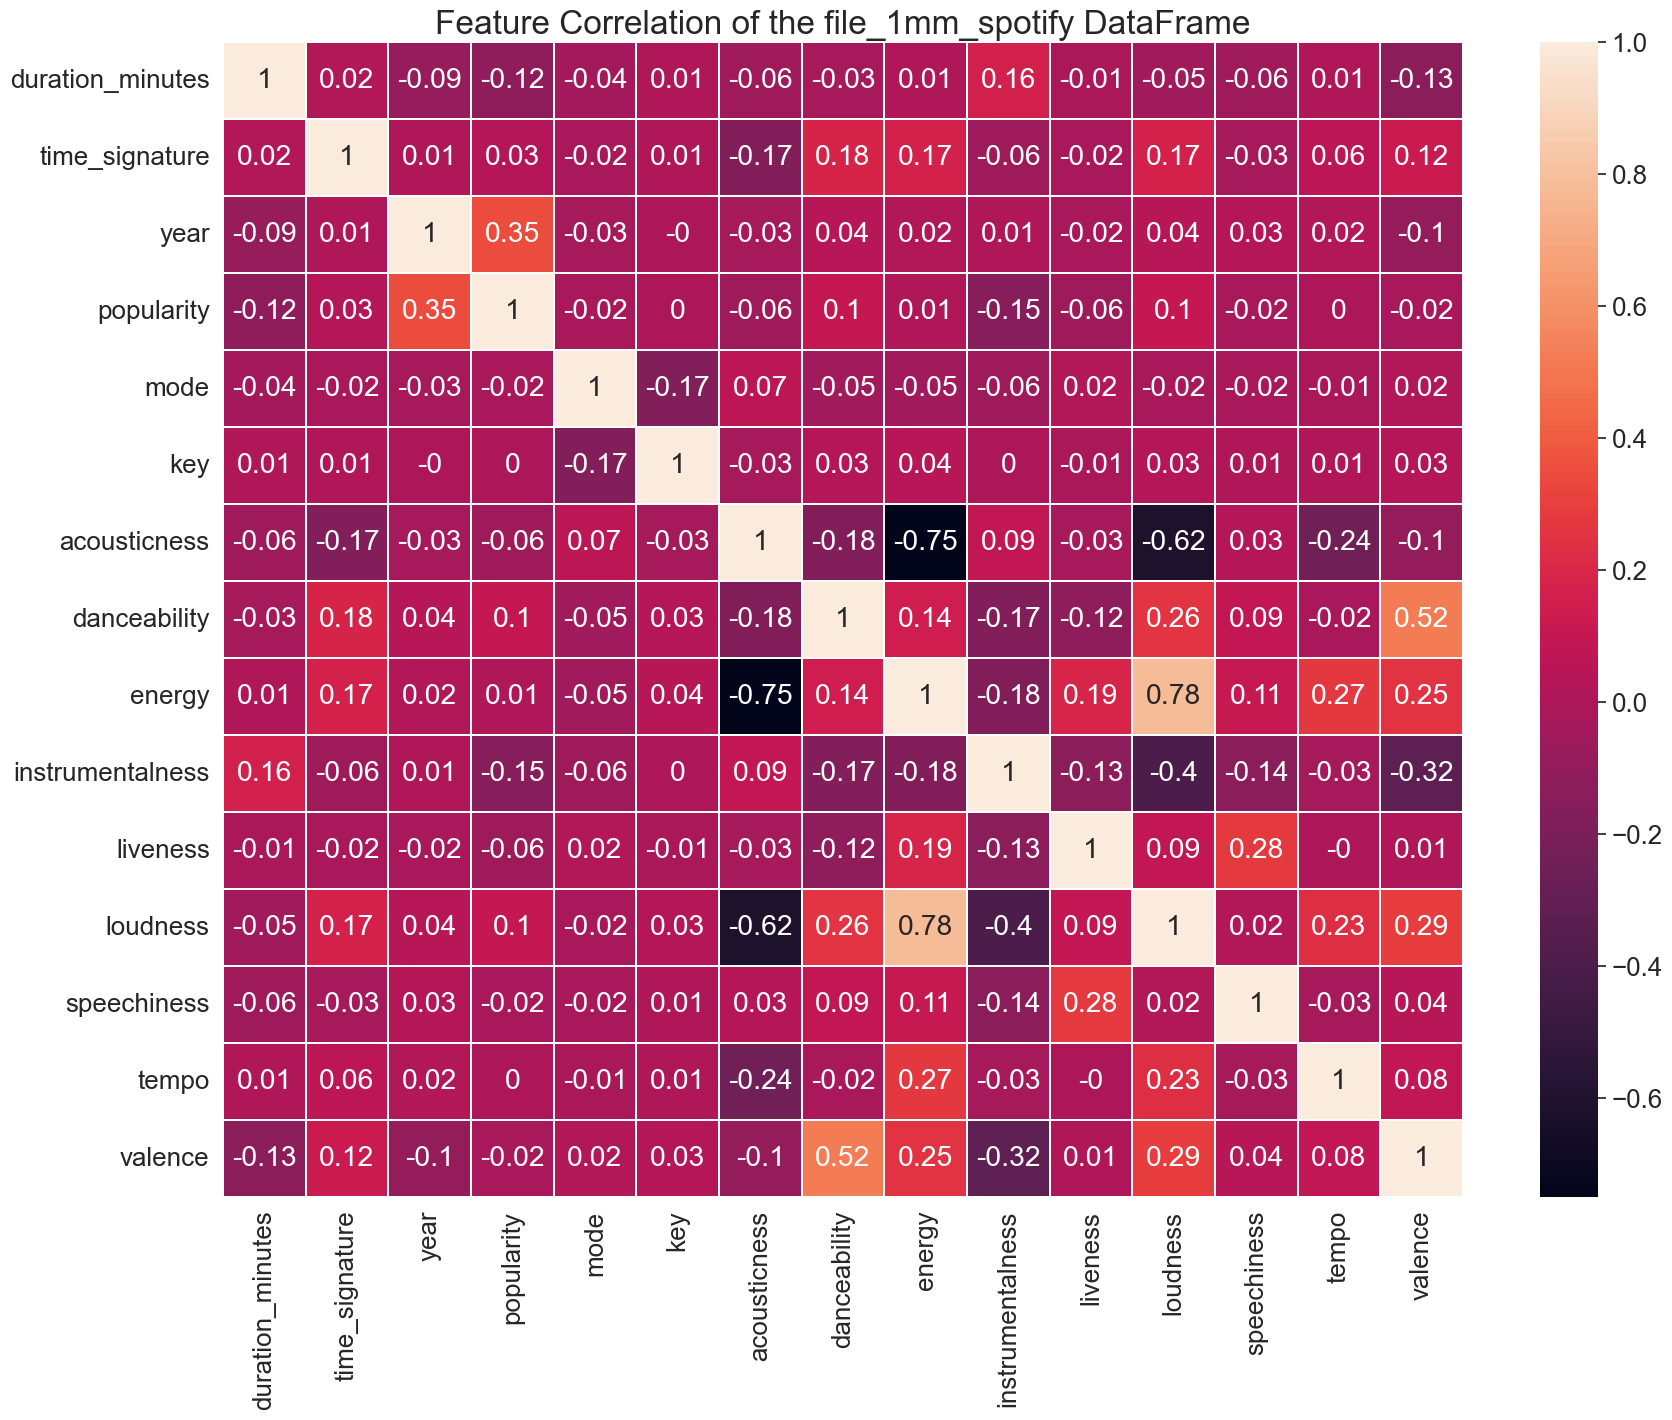

In [21]:
# Check out feature correlations of file_1mm_spotify
file_1mm_spotify_heatmap = file_1mm_spotify.select_dtypes(['float64', 'int64'])

sns.set(font_scale=1.7)
plt.subplots(figsize=(20,15))
sns.heatmap(round(file_1mm_spotify_heatmap.corr(), 2), annot=True, linewidths=0.05)
plt.title('Feature Correlation of the file_1mm_spotify DataFrame', fontsize=24)

For the file_1mm_spotify dataframe, below are noteworthy correlations:
- energy and loudness have a strong postive correlation of 0.78
- danceability and valence have a strong positive correlation of 0.52
- popularity and year have a medium positive correlation of 0.35
- loudness and valence have a small positive correlation of 0.29
- speechiness and liveness have a small positive correlation of 0.28
- energy and tempo have a small positive correlation of 0.27
- loudness and danceability have a small positive correlation of 0.26
- energy and valence have a small positive correlation of 0.25
- loudness and tempo have a small positive correlation of 0.23

\
I thought the correlations would be stronger but in a way, they make sense as each feature is unique given the nature of music.

Text(0.5, 1.0, 'Feature Correlation of the file_1921_2020_spotify DataFrame')

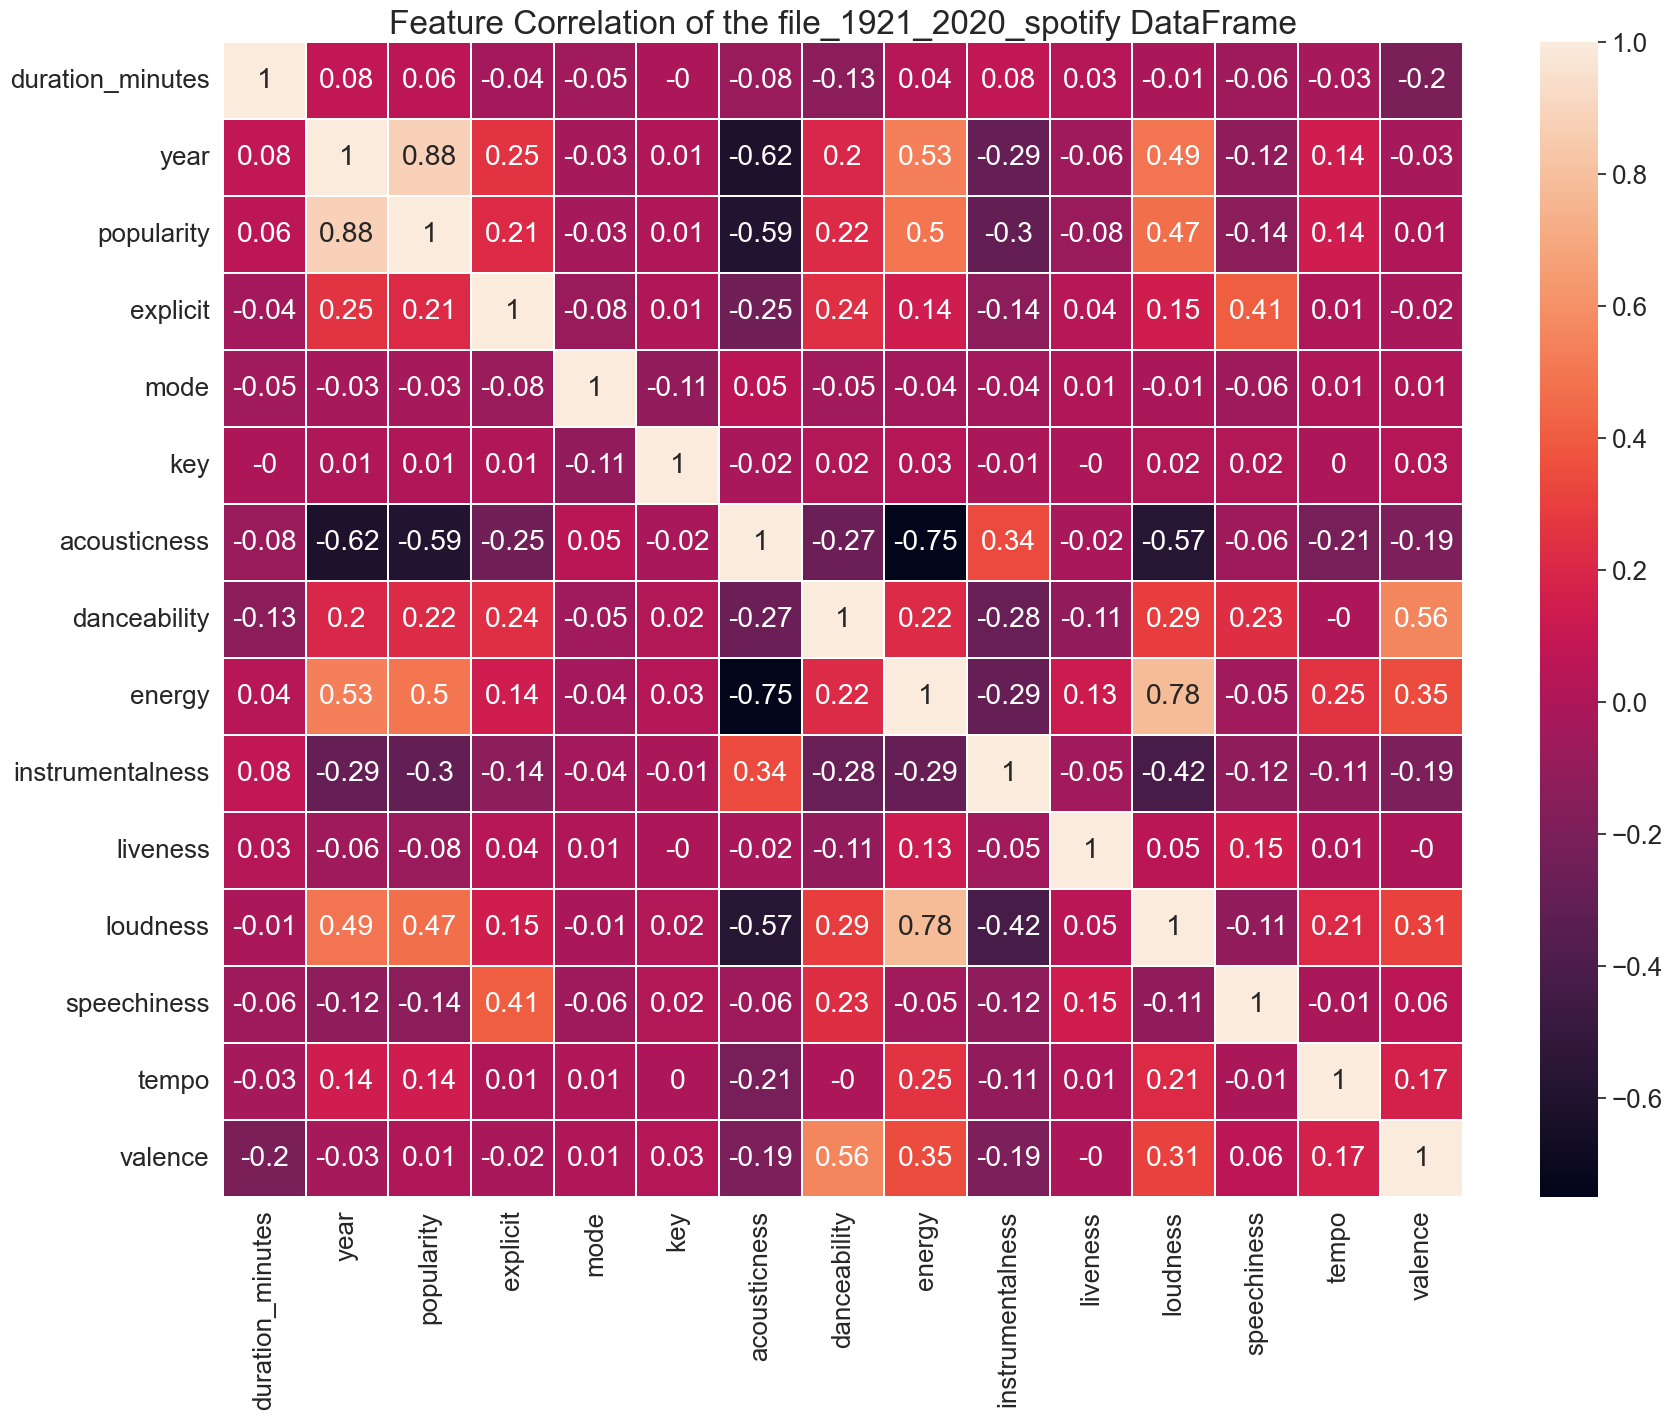

In [22]:
# Check out feature correlations of file_1921_2020_spotify
file_1921_2020_spotify_heatmap = file_1921_2020_spotify.select_dtypes(['float64', 'int64'])

sns.set(font_scale=1.7)
plt.subplots(figsize=(20,15))
sns.heatmap(round(file_1921_2020_spotify_heatmap.corr(), 2), annot=True, linewidths=0.05)
plt.title('Feature Correlation of the file_1921_2020_spotify DataFrame', fontsize=24)

For the file_1921_2020_spotify dataframe, 
- popularity and year have a medium positive correlation of 0.88 check
- energy and loudness have a strong postive correlation of 0.78 check
- danceability and valence have a strong positive correlation of 0.56 check
- energy and year have a strong positive correlation of 0.53 check
- energy and popularity have a strong positive correlation of 0.50 check
- year and loudness have a medium positive correlation of 0.49 check
- popularity and loudness have a medium positive correlation of 0.47 check
- speechiness and explicit have a small positive correlation of 0.41 check
- energy and valence have a small positive correlation of 0.35 check
- instrumentalness and acousticness have a small positive correlation of 0.34 check
- loudness and valence have a small positive correlation of 0.31 check
- loudness and danceability have a small positive correlation of 0.29 check
- energy and tempo have a small positive correlation of 0.25 check
- explicit and danceability have a small positive correlation of 0.24 check
- speechiness and danceability have a small positive correlation of 0.23 check
- energy and danceability have a small positive correlation of 0.22 check
- loudness and tempo have a small positive correlation of 0.21 check
- danceability and year have a small positive correlation of 0.20 check

\
The correlations of this dataframe are stronger than the file_1mm_spotify dataframe. Perhaps that's due to the nearly 80 years worth of data... which is close to 60 years worth more?

(array([-25.,   0.,  25.,  50.,  75., 100., 125.]),
 [Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125')])

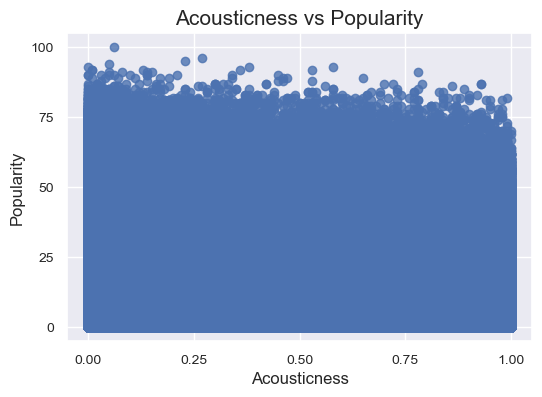

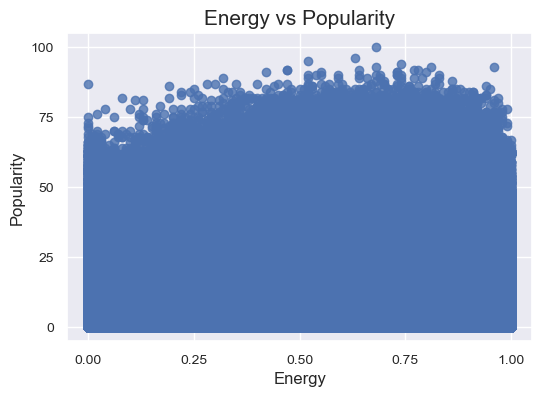

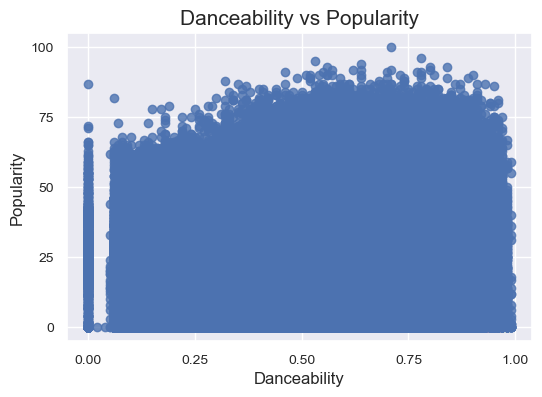

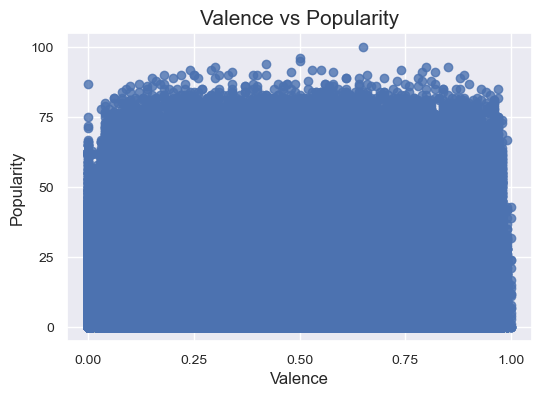

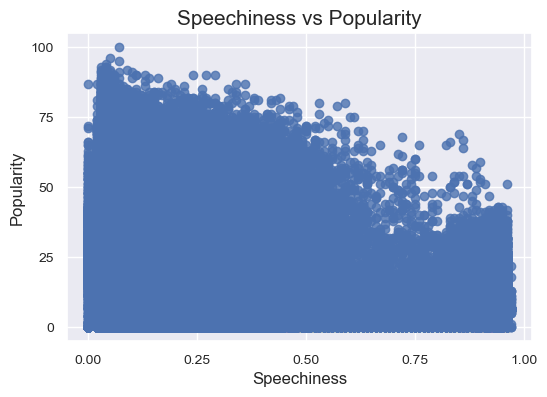

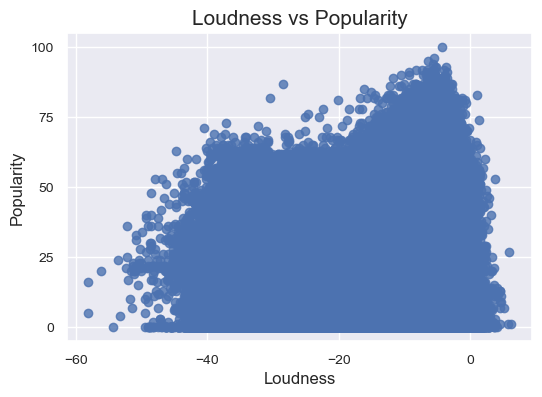

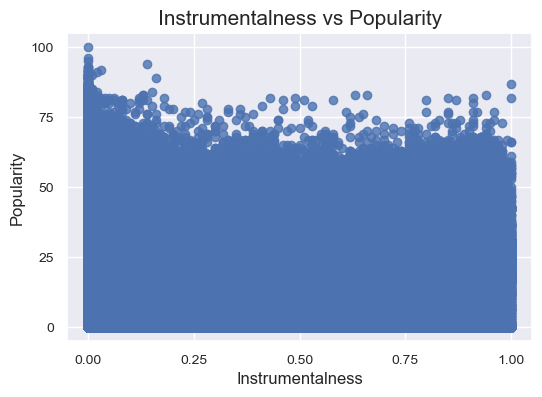

In [23]:
# Scatter plot popularity comparisons of key features for the file_1mm_spotify dataframe
# I elected to create these scatter plots for only this dataframe given the volume of data it possesses
plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['acousticness'], file_1mm_spotify['popularity'], alpha=0.8)
plt.title('Acousticness vs Popularity', fontsize=15)
plt.xlabel('Acousticness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['energy'], file_1mm_spotify['popularity'], alpha=0.8)
plt.title('Energy vs Popularity', fontsize=15)
plt.xlabel('Energy', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['danceability'], file_1mm_spotify['popularity'], alpha=0.8)
plt.title('Danceability vs Popularity', fontsize=15)
plt.xlabel('Danceability', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['valence'], file_1mm_spotify['popularity'], alpha=0.8)
plt.title('Valence vs Popularity', fontsize=15)
plt.xlabel('Valence', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['speechiness'], file_1mm_spotify['popularity'], alpha=0.8)
plt.title('Speechiness vs Popularity', fontsize=15)
plt.xlabel('Speechiness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['loudness'], file_1mm_spotify['popularity'], alpha=0.8)
plt.title('Loudness vs Popularity', fontsize=15)
plt.xlabel('Loudness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['instrumentalness'], file_1mm_spotify['popularity'], alpha=0.8)
plt.title('Instrumentalness vs Popularity', fontsize=15)
plt.xlabel('Instrumentalness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Popularity', fontsize=12)
plt.yticks(fontsize=10)

While focusing on track's/genre's respective popularities, key inights were found. The following analysis is from an "on average" perspective. The less acousticness, the more popular a track/genre is. Though, acousticness's impact on popularity is not strong. Energy's popularity sweet spot, which is measured between 0-1, hovers around 0.50-0.75. The more danceable a track/genre, the more popular... 0.55-0.75 is the sweet spot. Valence is not a strong predictor of popularity while on the other hand, speechiness is. The less speechiness, the more popular (sweet spot is 0-0.10). Loudness also is a strong predictor of popularity as its sweet spot is -15 to -5 dBs. Lastly, instrumentalness is like valence where it's not a strong predictor of popularity, though, an instrumentallness of 0 is most possible.

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25]),
 [Text(0, -0.25, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25')])

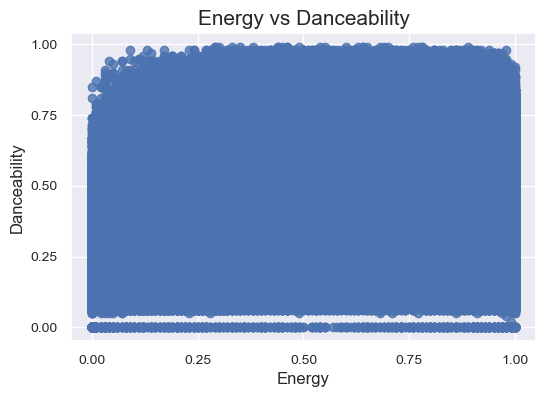

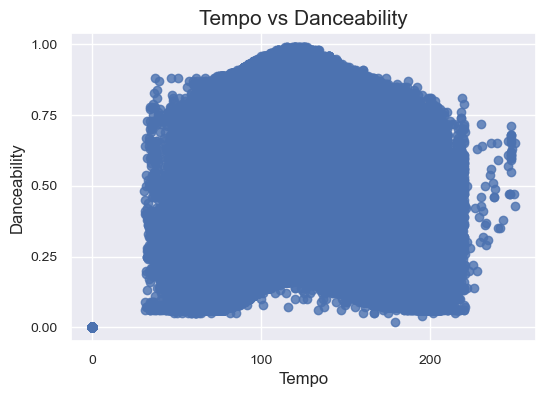

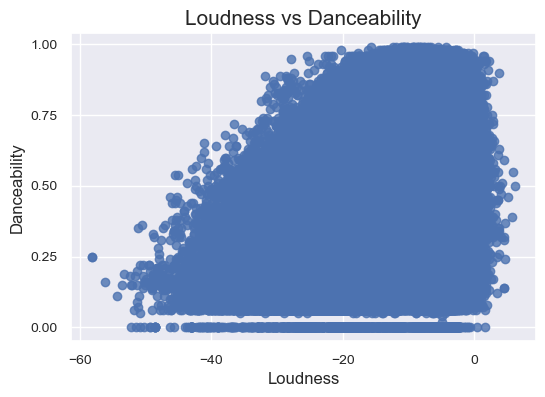

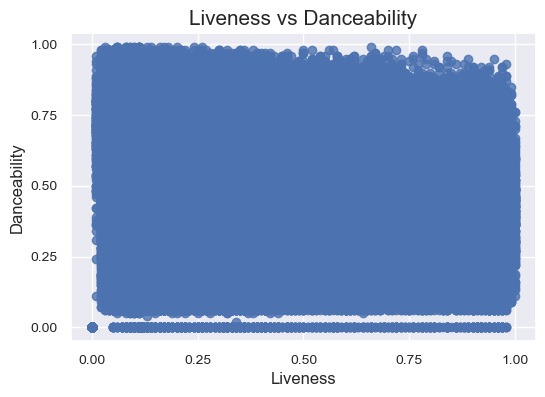

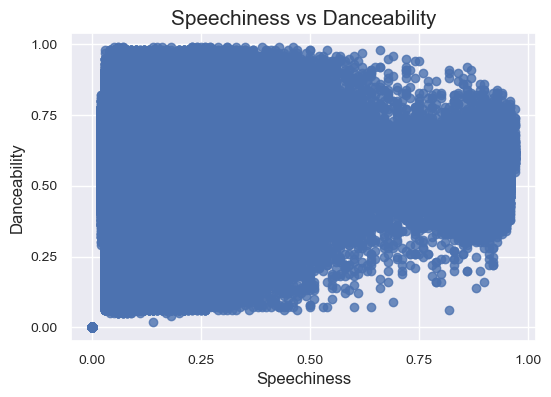

In [24]:
# Scatter plot danceability comparisons of key features for the file_1921_2020_spotify dataframe
# I elected to create these scatter plots for only this dataframe given the volume of data it possesses
plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['energy'], file_1mm_spotify['danceability'], alpha=0.8)
plt.title('Energy vs Danceability', fontsize=15)
plt.xlabel('Energy', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['tempo'], file_1mm_spotify['danceability'], alpha=0.8)
plt.title('Tempo vs Danceability', fontsize=15)
plt.xlabel('Tempo', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['loudness'], file_1mm_spotify['danceability'], alpha=0.8)
plt.title('Loudness vs Danceability', fontsize=15)
plt.xlabel('Loudness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['liveness'], file_1mm_spotify['danceability'], alpha=0.8)
plt.title('Liveness vs Danceability', fontsize=15)
plt.xlabel('Liveness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

plt.subplots(figsize=(6, 4))
plt.scatter(file_1mm_spotify['speechiness'], file_1mm_spotify['danceability'], alpha=0.8)
plt.title('Speechiness vs Danceability', fontsize=15)
plt.xlabel('Speechiness', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Danceability', fontsize=12)
plt.yticks(fontsize=10)

Taking a look at what makes a dance "danceable," energy and liveness aren't strong predictors but tempo, loudness, and speechiness are. The sweet spot for tempo is around 100-130 BPMs while the sweet spot for loudness is -20 to 0 dBs, and the sweet spot for speechiness is 0-0.60.

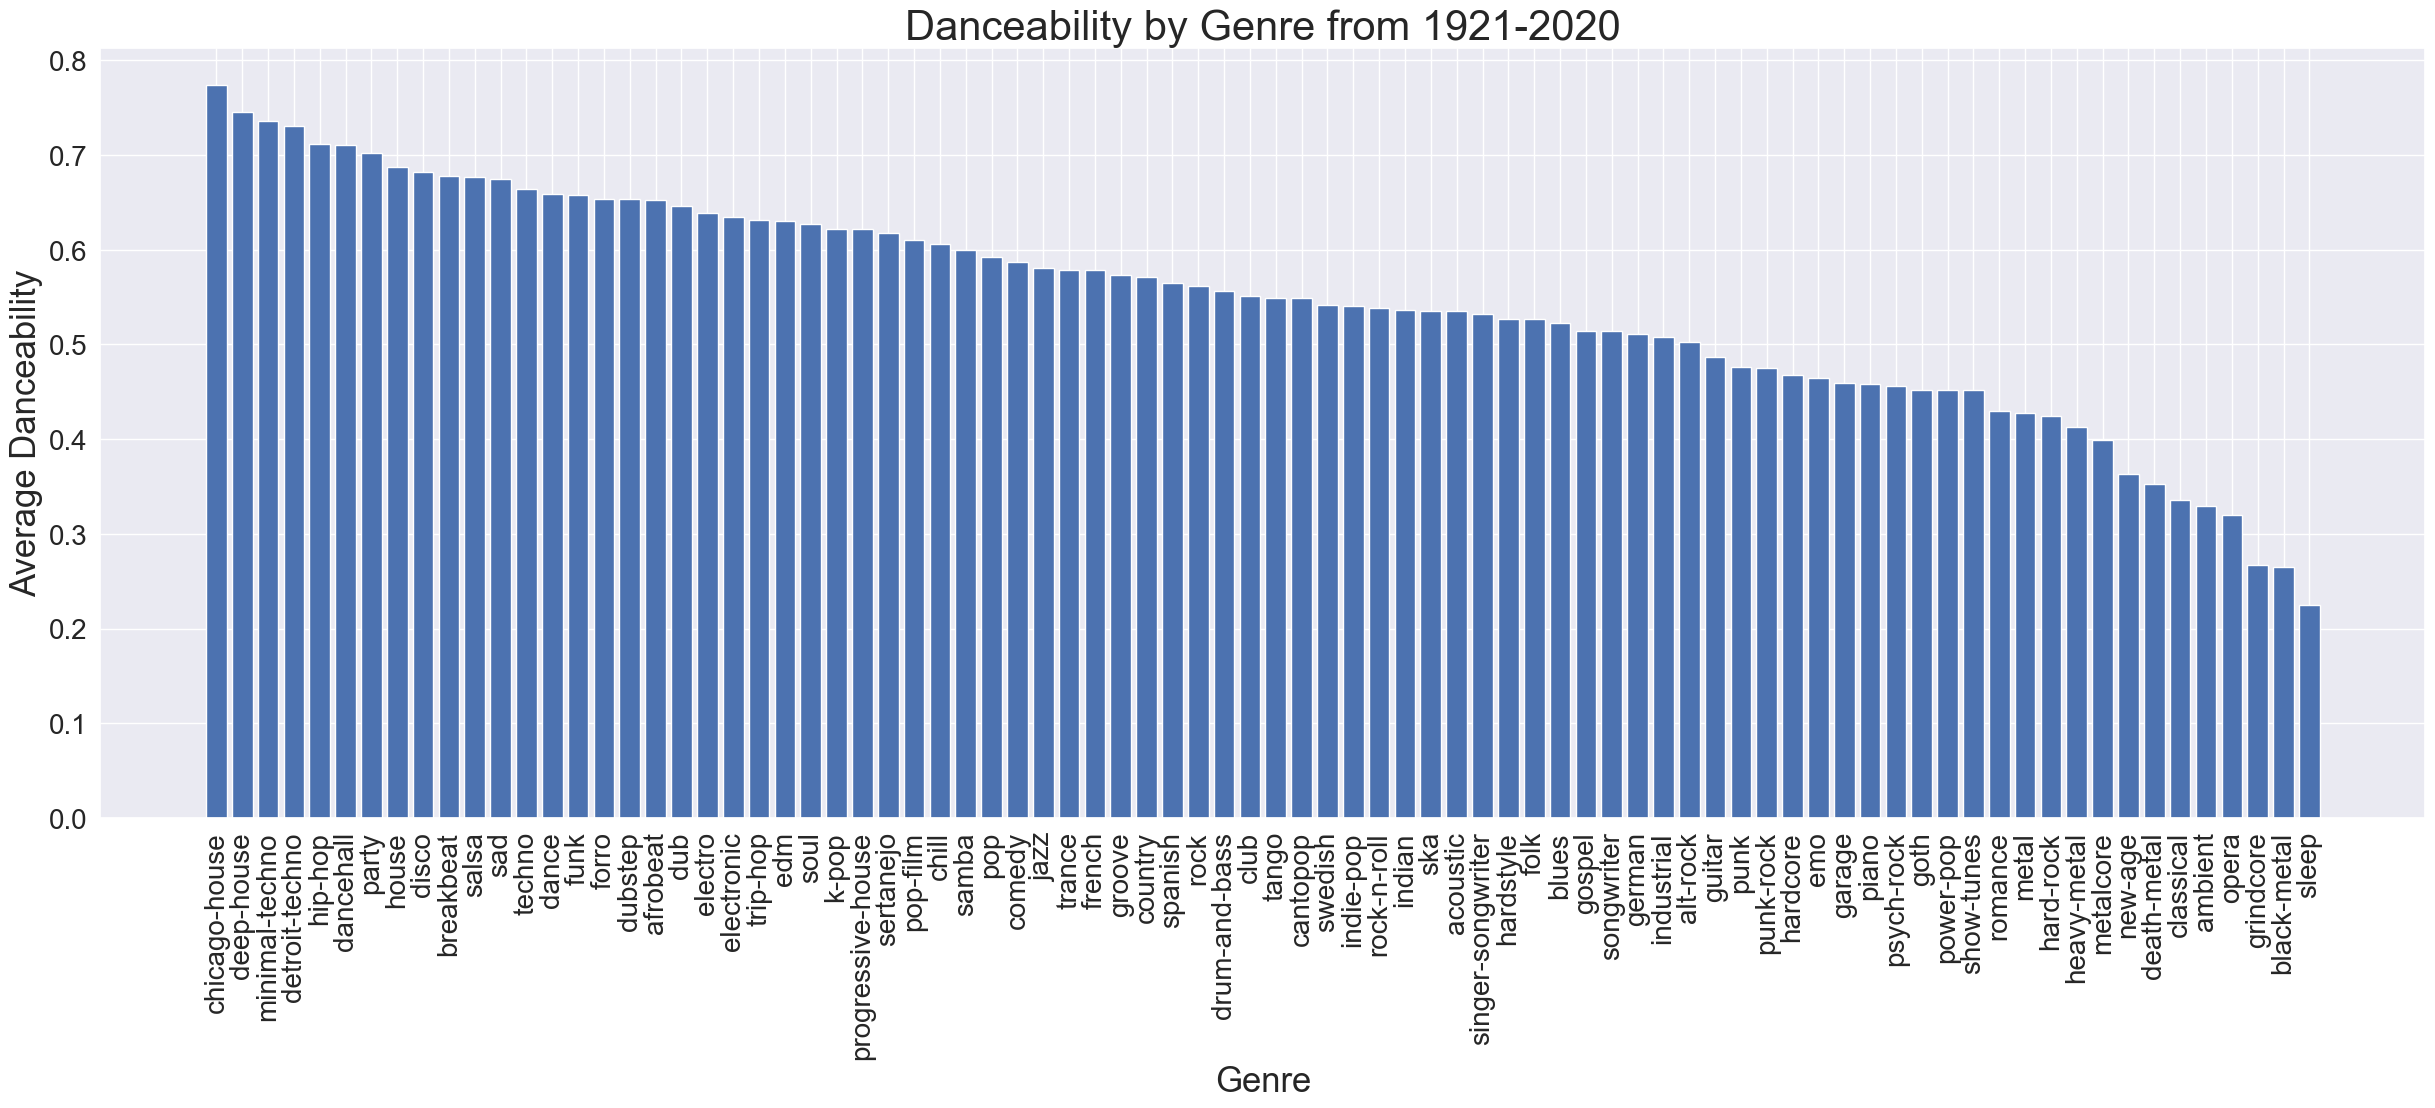

In [25]:
# One last look into danceability... Which genres lead and lag the rest (using the file_1mm_spotify dataframe)?
plt.figure(figsize=(30, 10))
genre_danceability = file_1mm_spotify.groupby('genre')['danceability'].mean().sort_values(ascending=False)
plt.bar(genre_danceability.index, genre_danceability.values)
plt.subplots_adjust(hspace=25, wspace=50)
plt.title('Danceability by Genre from 1921-2020', fontsize=30)
plt.xlabel('Genre', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('Average Danceability', fontsize=25)
plt.yticks(fontsize=20)
plt.show()

Unsurprisingly, techno and house genres score highly as does house and party while sleep ranks last. Surprisingly, sad music ranks high!

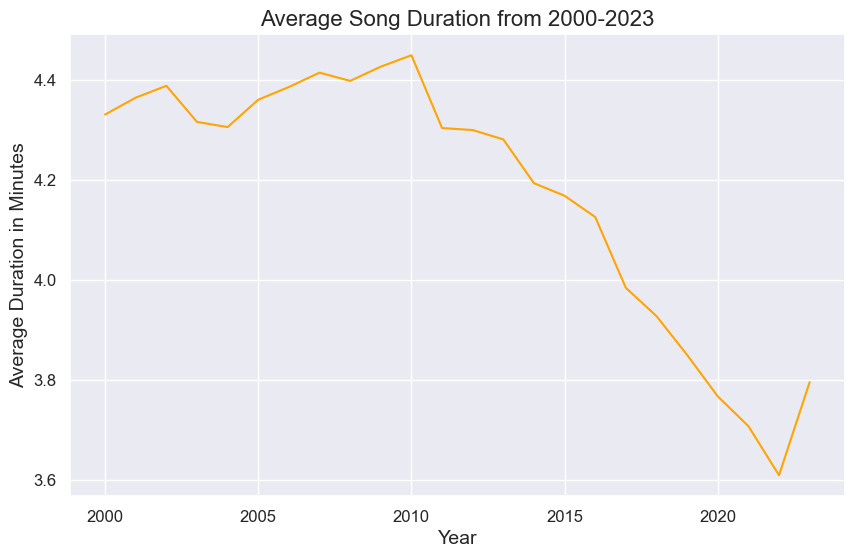

In [26]:
# Visualize average track_duration from 2000-2023 for the file_1mm_spotify dataframe
plt.figure(figsize=(10, 6))
track_duration_over_time = file_1mm_spotify.groupby('year')['duration_minutes'].mean()
sns.lineplot(x=track_duration_over_time.index, y=track_duration_over_time.values, color='orange')
plt.title('Average Song Duration from 2000-2023', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Average Duration in Minutes', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

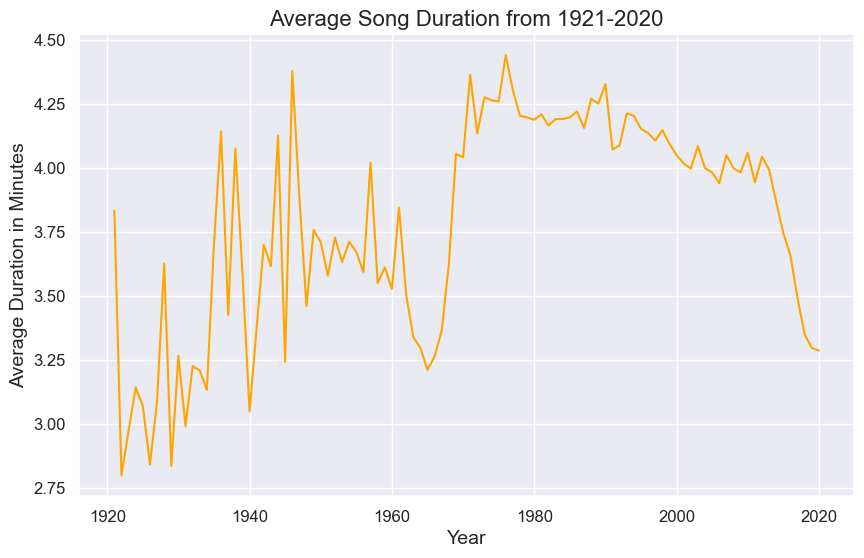

In [27]:
# Visualize average track_duration from 1921-2020 for the file_1921_2020_spotify dataframe
plt.figure(figsize=(10, 6))
track_duration_over_time_2 = file_1921_2020_spotify.groupby('year')['duration_minutes'].mean()
sns.lineplot(x=track_duration_over_time_2.index, y=track_duration_over_time_2.values, color='orange')
plt.title('Average Song Duration from 1921-2020', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Average Duration in Minutes', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

 While I dove into this in the SQL EDA portion above, visualizing the year-over-year change in average song duration can be more effective in comprehending the trend.

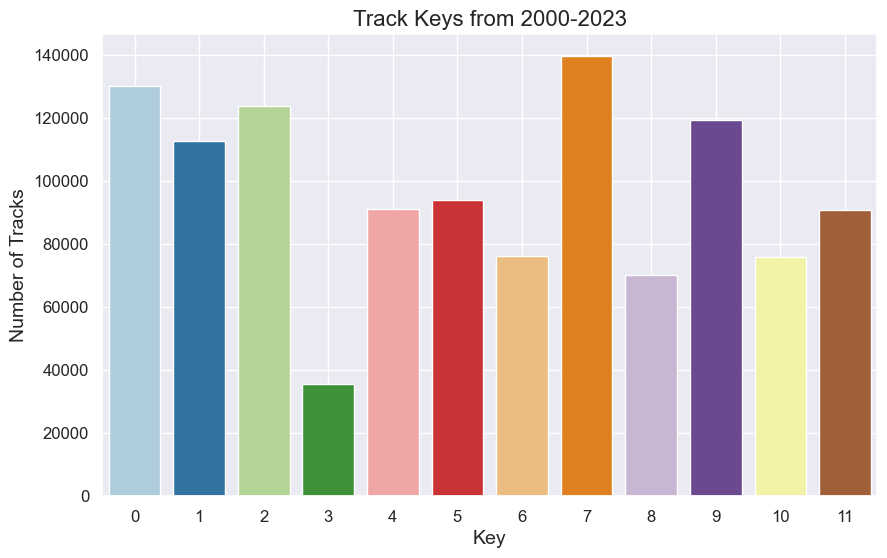

In [28]:
# Let's look at the track keys of the file_1mm_spotify dataframe. Perhaps there's a trend?
plt.figure(figsize=(10, 6))
keys_barplot = file_1mm_spotify['key'].value_counts()
sns.barplot(x=keys_barplot.index, y=keys_barplot.values, palette='Paired')
plt.title('Track Keys from 2000-2023', fontsize=16)
plt.xlabel('Key', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Number of Tracks', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

Key 7 leads the way in frequency with keys 0, 2, and 3 closely behind. Key 3 lags far behind the rest of the keys. The more popular keys must be a sign of where modern day music has evolved into.

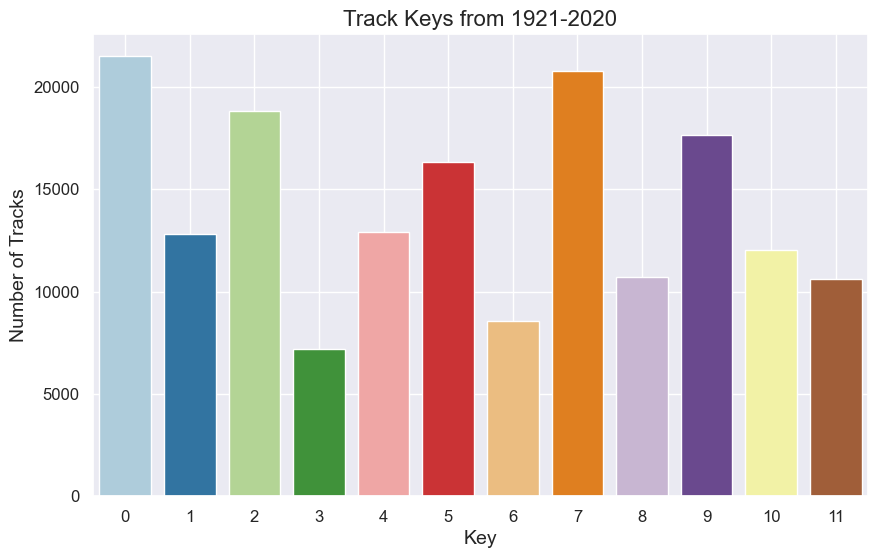

In [29]:
# Let's look at the track keys of the file_1921_2020_spotify dataframe. Perhaps there's a trend?
plt.figure(figsize=(10, 6))
keys_barplot_2 = file_1921_2020_spotify['key'].value_counts()
sns.barplot(x=keys_barplot_2.index, y=keys_barplot_2.values, palette='Paired')
plt.title('Track Keys from 1921-2020', fontsize=16)
plt.xlabel('Key', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Number of Tracks', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

Key 0 leads the way in frequency with keys 7 and 2 closely behind. Key 3 once again lags behind the rest of the keys.

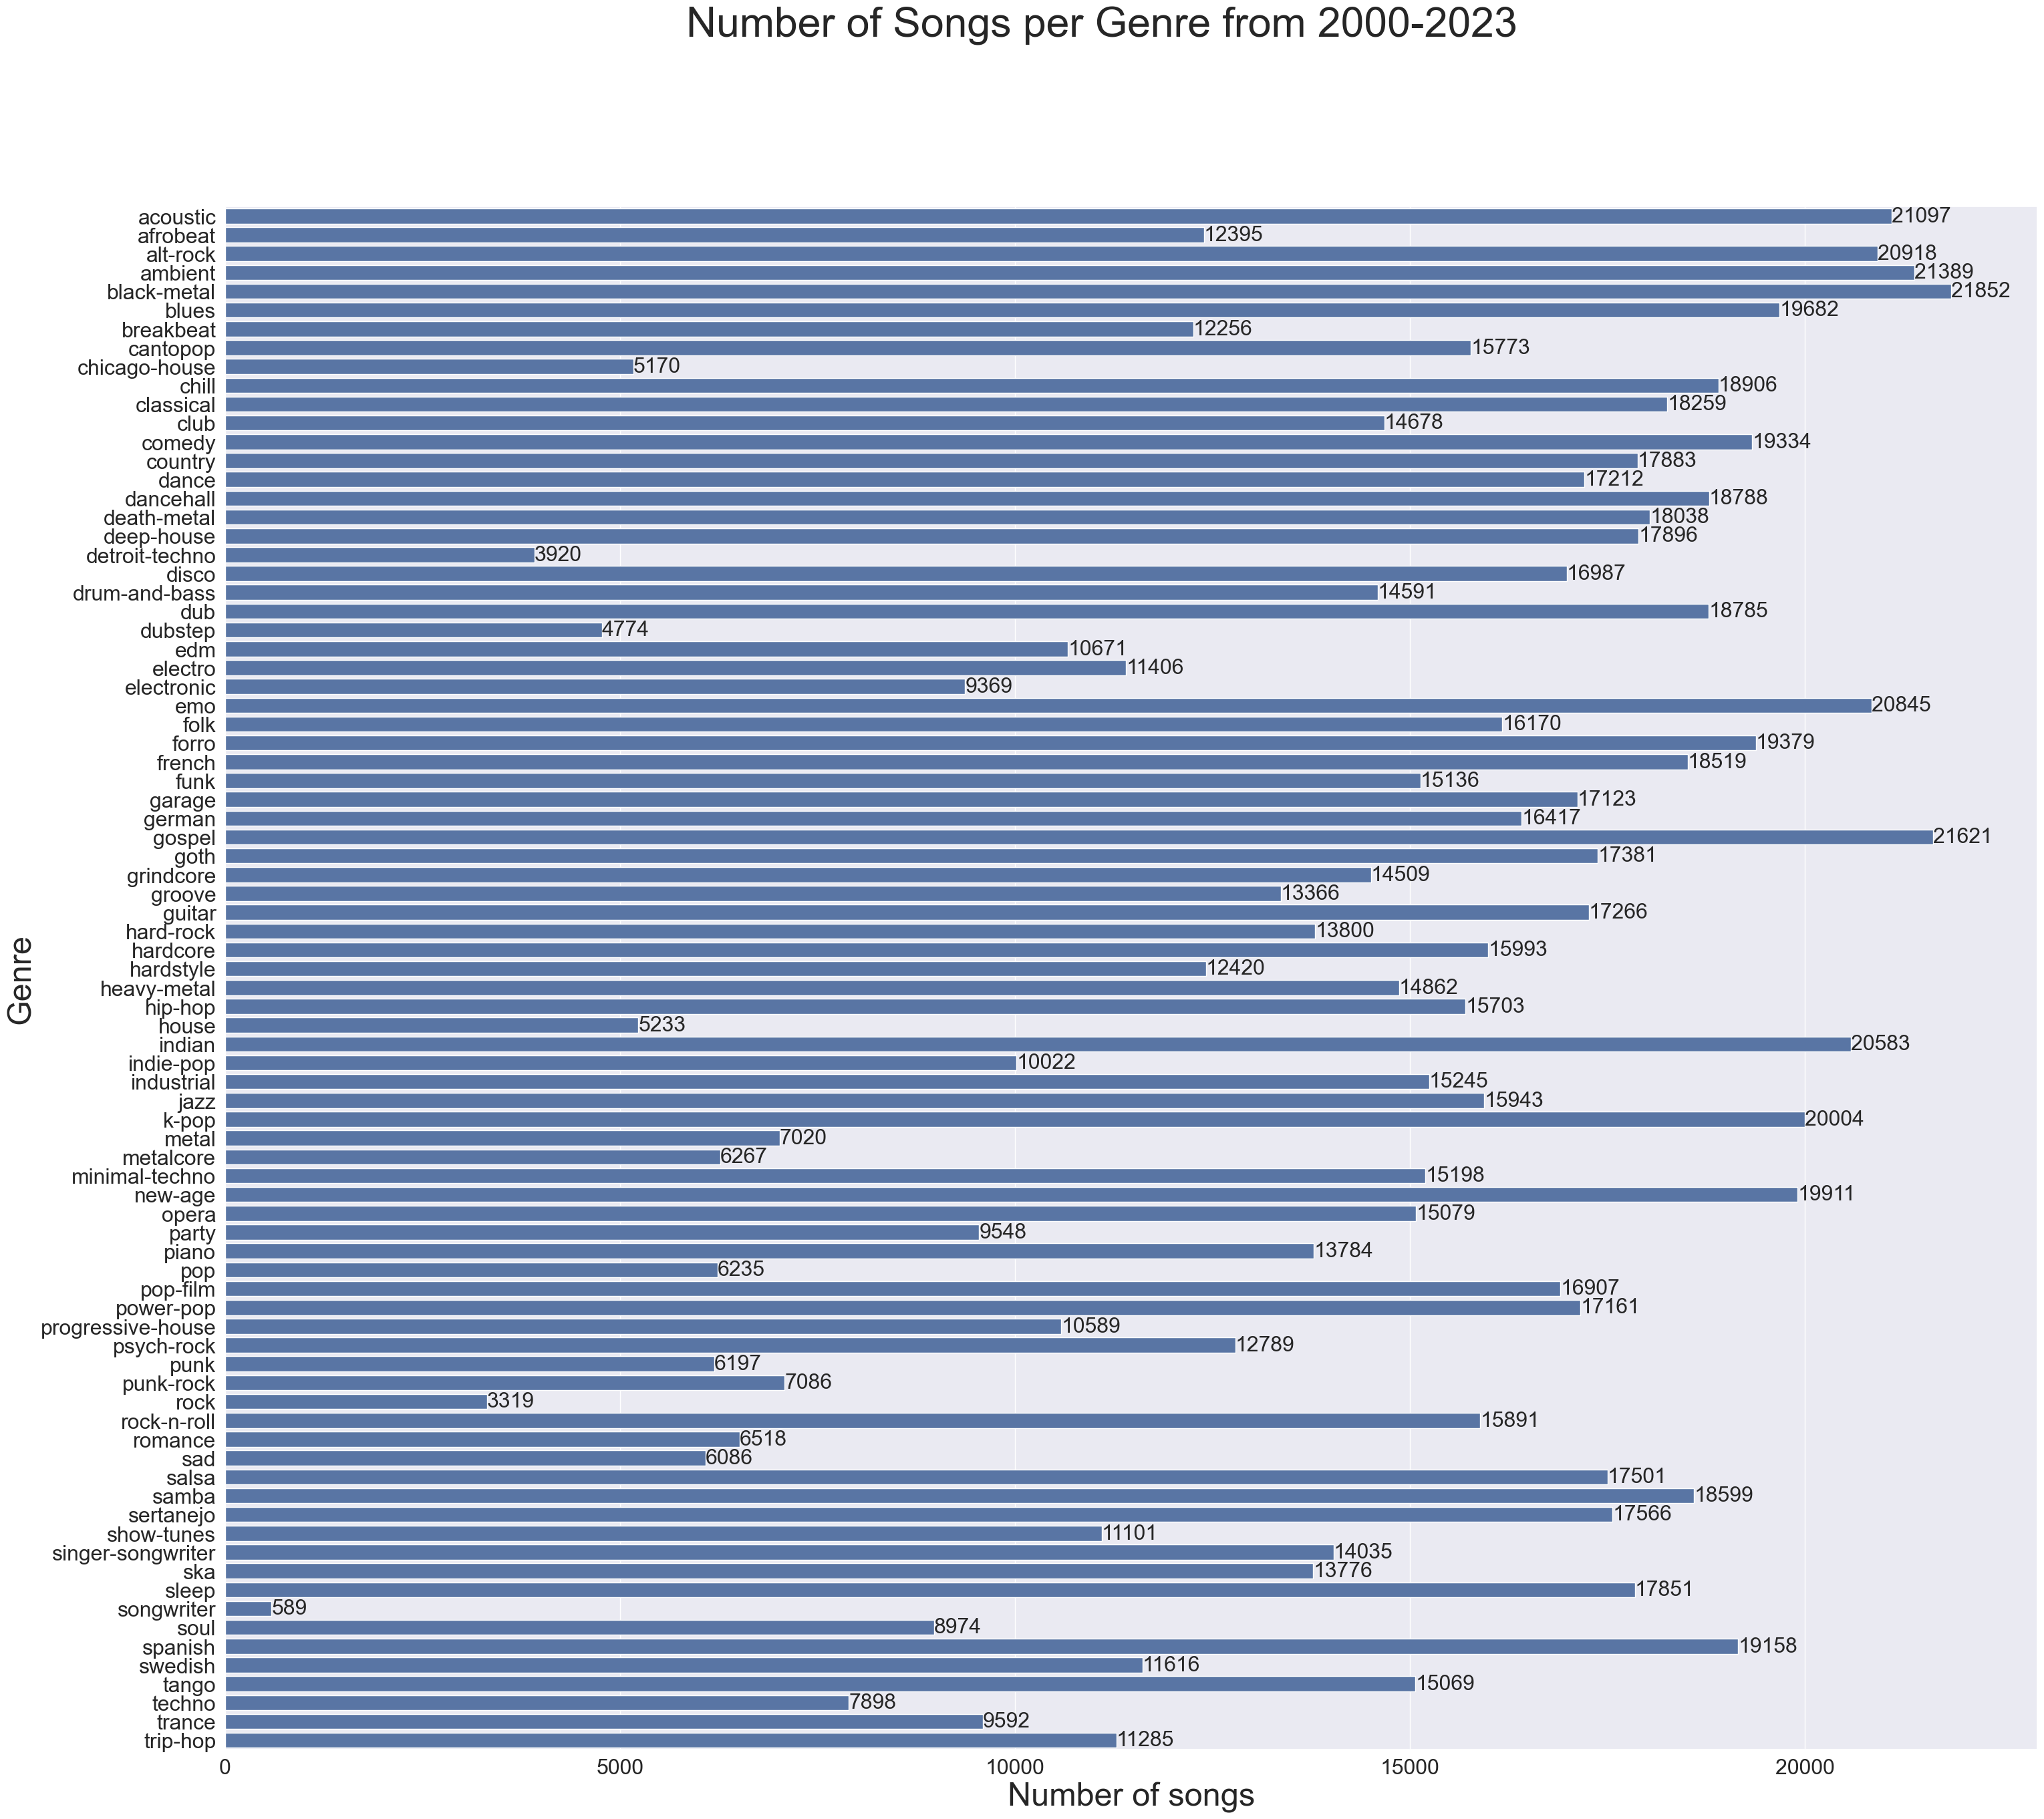

In [30]:
# Visualize count chart to see number of songs per genre in the file_1mm_spotify dataframe
fig, axes = plt.subplots(figsize = (35, 30))
fig.subplots_adjust(hspace=25, wspace=25)
fig.suptitle('Number of Songs per Genre from 2000-2023', fontsize=45)
sns.countplot(y='genre', data=file_1mm_spotify, width=0.8)
axes.xaxis.set_tick_params(labelsize=23)
axes.yaxis.set_tick_params(labelsize=23)
plt.xlabel('Number of songs', fontsize=35)
plt.ylabel('Genre', fontsize=35)
for container in axes.containers:
    axes.bar_label(container, fontsize=23)

I've looked at both dataframes features more high level, but I haven't looked into the most popular artists for each dataframe... time to dig in!

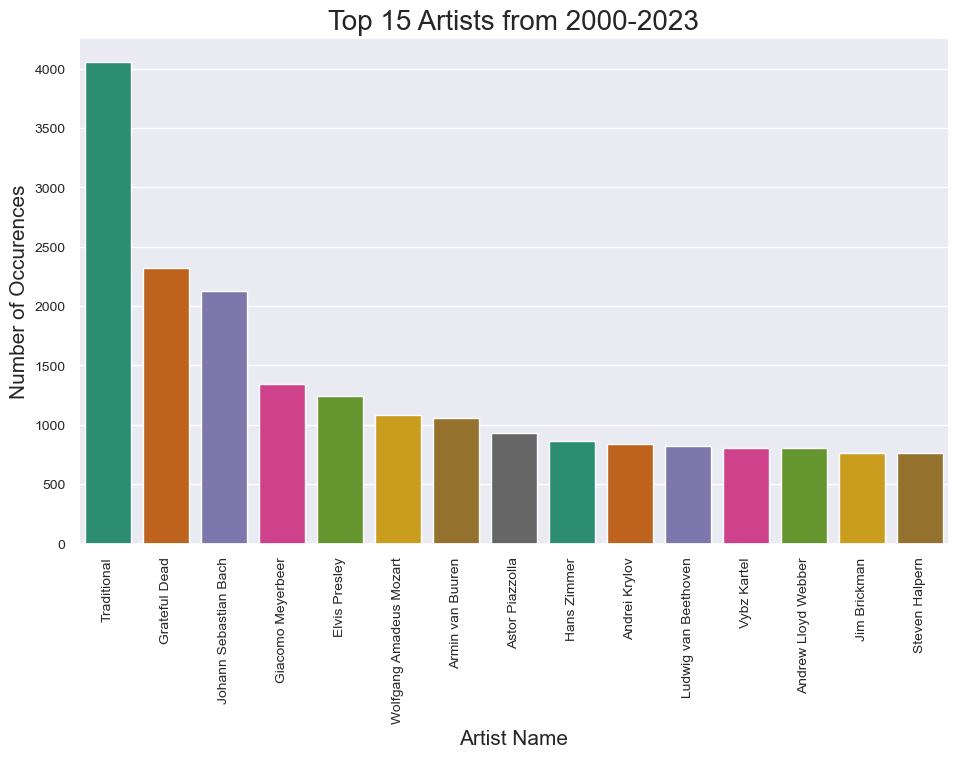

In [31]:
# Top 15 artists for the file_1mm_spotify dataframe
top_artist_1mm_spotify = file_1mm_spotify['artist_name'].value_counts().head(15)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_artist_1mm_spotify.index, y=top_artist_1mm_spotify.values, palette='Dark2')
plt.title('Top 15 Artists from 2000-2023', fontsize=20)
plt.xlabel('Artist Name', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Occurences', fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

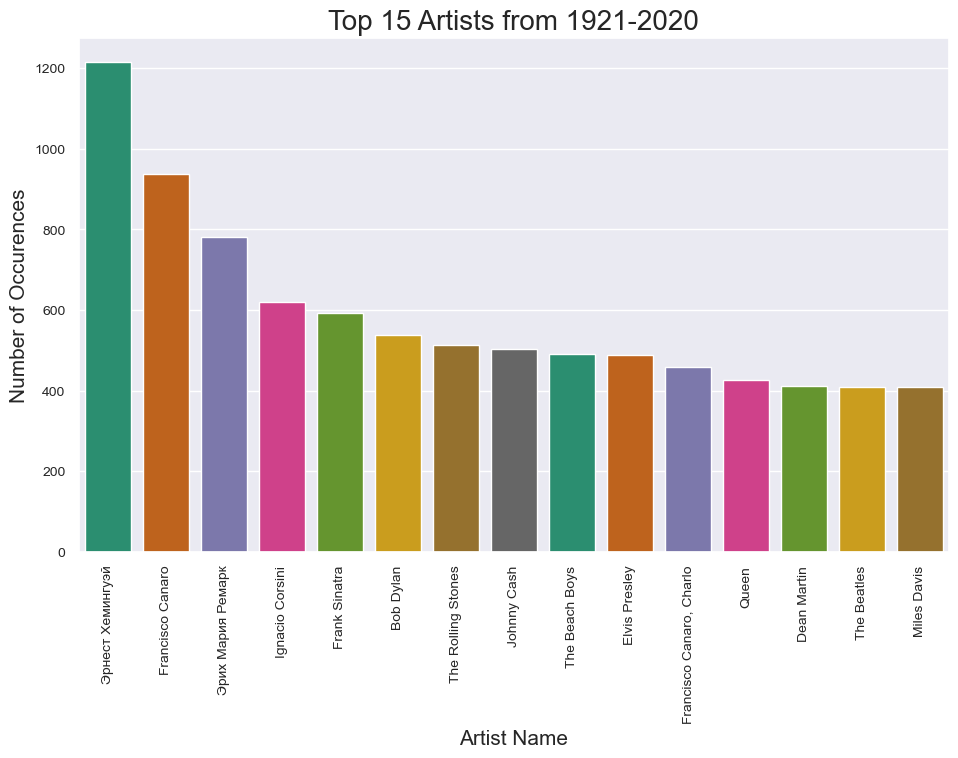

In [32]:
# Top 15 artists for the file_1921_2020_spotify dataframe
top_artist_1921_2020_spotify = file_1921_2020_spotify['artist_name'].value_counts().head(15)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_artist_1921_2020_spotify.index, y=top_artist_1921_2020_spotify.values, palette='Dark2')
plt.title('Top 15 Artists from 1921-2020', fontsize=20)
plt.xlabel('Artist Name', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Occurences', fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

As expected, we see very little overlap between the dataframes with the exception of Johnny Cash. 